# 20191022/00019988 Sky Subtraction

This is a very preliminary exploration of sky subtraction using night 20191022 exposure 19988, which was one of the "off" exposures for the M33 sequence.

Big caveats about the processing used here:
  * it doesn't include twilight flat corrections
  * it did have a bug where it applied the fiberflat twice, leaving it to sky-subtraction to
    re-absorb the difference as nuisance terms.
    
But it actually turned out pretty well for the first night processing...

Stephen Bailey

In [1]:
%pylab inline
import numpy as np
import desispec.io
import desimodel.io

Populating the interactive namespace from numpy and matplotlib


In [239]:
night = 20191022
expid = 19988
reduxdir = os.getenv('DESI_ROOT')+'/spectro/redux/sjbailey/exposures/{}/{:08d}/'.format(night, expid)
fr = desispec.io.read_frame('{}/frame-r3-{:08d}.fits'.format(reduxdir, expid))
sp = desispec.io.read_frame('{}/sframe-r3-{:08d}.fits'.format(reduxdir, expid))
sky = desispec.io.read_sky('{}/sky-r3-{:08d}.fits'.format(reduxdir, expid))

In [240]:
fp = desimodel.io.load_fiberpos()
fp.sort('FIBER')
fp = fp[fp['PETAL'] == 0]

(-100, 2000)

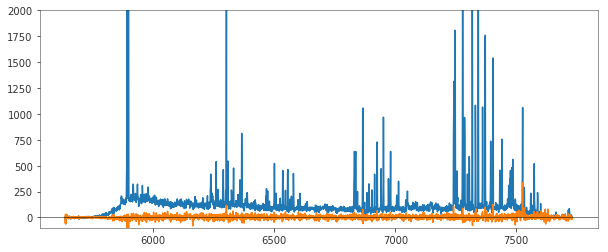

In [241]:
figure(figsize=(10,4))
i = 0
plot(fr.wave, fr.flux[i])
plot(sp.wave, sp.flux[i])
axhline(0, color='k', lw=0.5)
ylim(-100, 2000)

In [97]:
sumflux = np.sum(fr.flux, axis=1)
iisky = sp.fibermap['OBJTYPE'] == 'SKY'
pull = sp.flux*np.sqrt(sp.ivar)

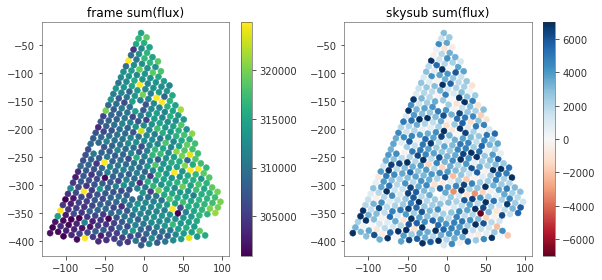

In [229]:
sumflux_fr = np.sum(fr.flux, axis=1)
sumflux_sp = np.sum(sp.flux, axis=1)

figure(figsize=(8.5,4))

subplot(121)
lo, hi = np.percentile(sumflux_fr, (1, 98))
scatter(fp['X'], fp['Y'], c=sumflux_fr.clip(lo, hi))
# plot(fp['X'][iisky], fp['Y'][iisky], 'rx')
colorbar()
title('frame sum(flux)')

subplot(122)
lo, hi = np.percentile(sumflux_sp, (1, 95))
scatter(fp['X'], fp['Y'], c=sumflux_sp.clip(-7e3,7e3), cmap='RdBu')
# scatter(fp['X'], fp['Y'], c=sumflux_sp.clip(-2, 2), cmap='RdBu')

colorbar()
title('skysub sum(flux)')

tight_layout()

mean(skysub flux) = 0.126
std(skysub flux)  = 1.413
nMAD(skysub flux) = 0.975


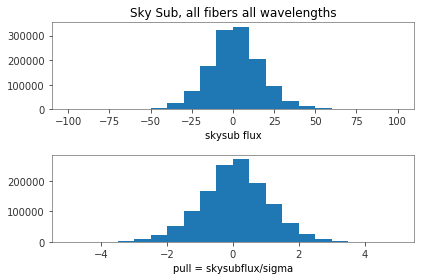

In [230]:
lo, hi = np.percentile(sumflux, (1, 95))

subplot(211)
_ = hist(sp.flux.ravel(), 20, (-100, 100))
xlabel('skysub flux')
title('Sky Sub, all fibers all wavelengths')

subplot(212)
_ = hist(pull.ravel(), 20, (-5, 5))
xlabel('pull = skysubflux/sigma')

tight_layout()

nmad = 1.4826*np.median(np.abs(pull - np.median(pull)))
print('mean(skysub flux) = {:.3f}'.format(np.mean(pull)))
print('std(skysub flux)  = {:.3f}'.format(np.std(pull)))
print('nMAD(skysub flux) = {:.3f}'.format(nmad))

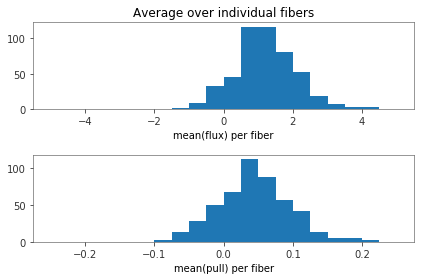

In [231]:
subplot(211)
_ = hist(np.mean(sp.flux, axis=1), 20, (-5, 5))
xlabel('mean(flux) per fiber')
title('Average over individual fibers')

subplot(212)
_ = hist(np.mean(pull, axis=1), 20, (-0.25, 0.25))
xlabel('mean(pull) per fiber')

tight_layout()

## mean(pull) and std(pull) vs. fiber number

In [190]:
sumflux = np.sum(fr.flux, axis=1)
lo, hi = np.percentile(sumflux, (5, 95))
ii = (lo <= sumflux) & (sumflux <= hi)
mpull = np.mean(pull, axis=1)
stdpull = np.std(pull, axis=1)

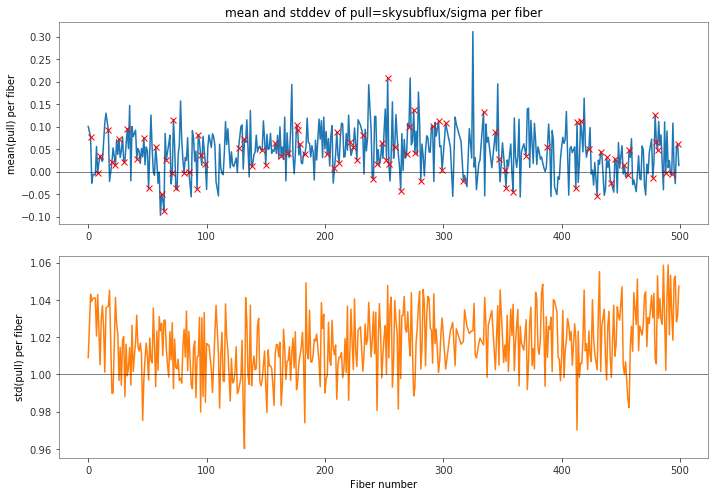

In [236]:
mpull = np.mean(pull, axis=1)
stdpull = np.std(pull, axis=1)

figure(figsize=(10, 7))

fiber = np.arange(len(mpull))
subplot(211)
plot(fiber[ii], mpull[ii], color='C0')
plot(fiber[ii & iisky], mpull[ii & iisky], 'rx')
axhline(0.0, color='k', lw=0.5)
ylabel('mean(pull) per fiber')
title('mean and stddev of pull=skysubflux/sigma per fiber')

subplot(212)
plot(fiber[ii], stdpull[ii], color='C1')
axhline(1.0, color='k', lw=0.5)
ylabel('std(pull) per fiber')
xlabel('Fiber number')

tight_layout()

## mean(pull) and std(pull) vs. wavelength

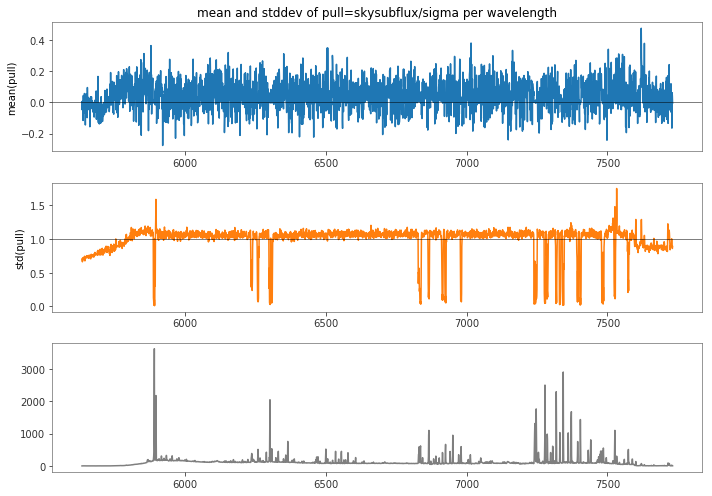

In [235]:
mpull = np.mean(pull[ii], axis=0)
stdpull = np.std(pull[ii], axis=0)

figure(figsize=(10, 7))

subplot(311)
plot(sp.wave, mpull, color='C0')
axhline(0.0, color='k', lw=0.5)
ylabel('mean(pull)')
title('mean and stddev of pull=skysubflux/sigma per wavelength')

subplot(312)
plot(sp.wave, stdpull, color='C1')
axhline(1.0, color='k', lw=0.5)
ylabel('std(pull)')

subplot(313)
plot(sky.wave, sky.flux[0], 'k', alpha=0.5)

tight_layout()

## mean(pull) and std(pull) vs. sky flux

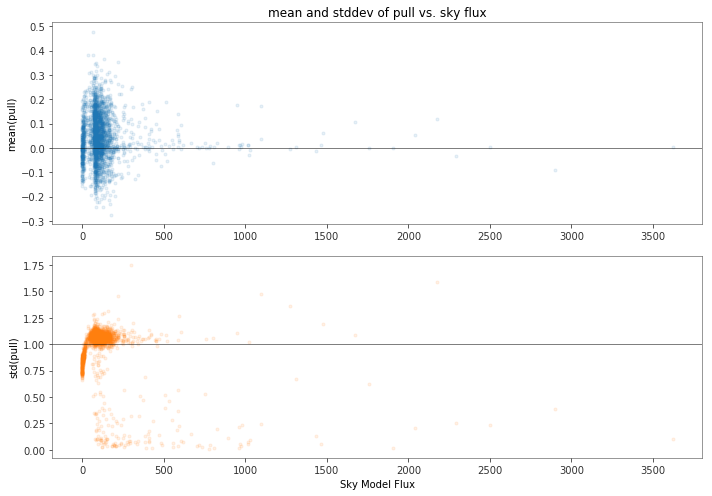

In [237]:
mpull = np.mean(pull[ii], axis=0)
stdpull = np.std(pull[ii], axis=0)

figure(figsize=(10, 7))

subplot(211)
plot(sky.flux[0], mpull, '.', color='C0', alpha=0.1)
axhline(0.0, color='k', lw=0.5)
ylabel('mean(pull)')
title('mean and stddev of pull vs. sky flux')

subplot(212)
plot(sky.flux[0], stdpull, '.', color='C1', alpha=0.1)
axhline(1.0, color='k', lw=0.5)
ylabel('std(pull)')
xlabel('Sky Model Flux')

tight_layout()

(0.5, 1.5)

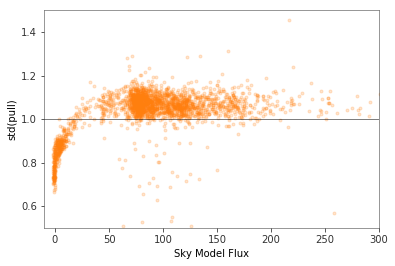

In [222]:
plot(sky.flux[0], stdpull, '.', color='C1', alpha=0.2)
axhline(1.0, color='k', lw=0.5)
ylabel('std(pull)')
xlabel('Sky Model Flux')
xlim(-10, 300)
ylim(0.5, 1.5)

## Some example spectra

Why is one of them exactly zero?

In [ ]:
Why is one of them exactly zero

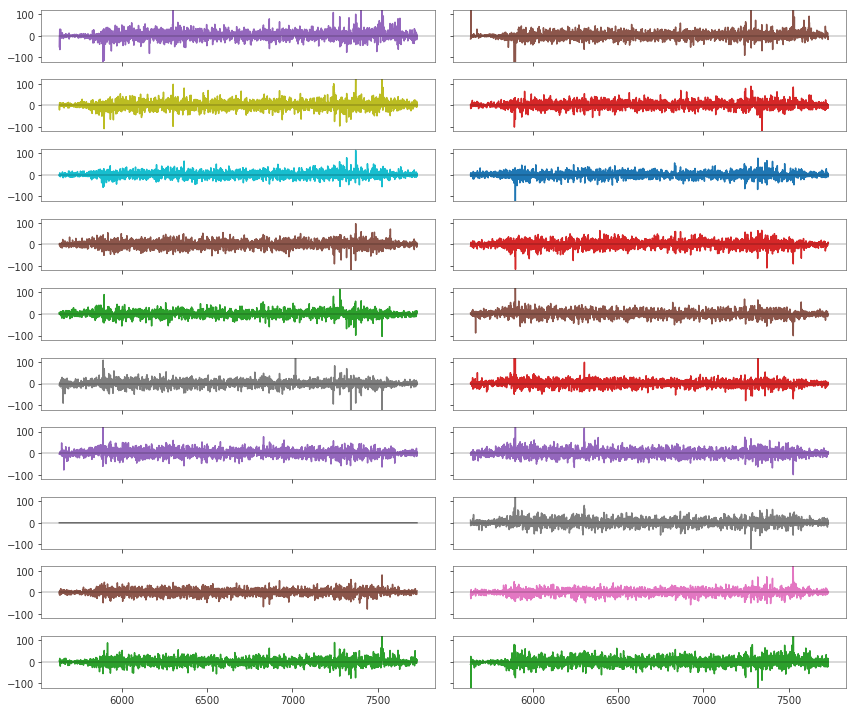

In [247]:
figure(figsize=(12,10))
for iplot, i in enumerate(np.linspace(0, sp.nspec-1, 20).astype(int)):
    subplot(10,2,iplot+1)
    color = 'C{}'.format(np.random.randint(0,10))
    plot(sp.wave, sp.flux[i]*(sp.mask[i]==0), color=color)
    ylim(-120, 120)
    if iplot % 2 != 0:
        yticks([-100, 0, 100], ['', '', '',])
    if iplot // 2 != 9:
        xticks([6000,7000], ['', ''])
    
    axhline(0, color='k', alpha=0.2)

tight_layout()